In [1]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import geopandas as gpd
import pandas as pd
import glob
import zipfile
# import rasterio
import os
import xarray as xr
import json

Populating the interactive namespace from numpy and matplotlib


In [24]:
from pathlib import Path
# dmPath = Path('../../Data_v1_1_Daymet')
dmPath = Path('C:/Users/rmcd/Downloads')
print('Daymet Path exists: ', dmPath.exists())
dmFile = Path(list(dmPath.glob('*_tmax_1980*.nc4'))[0])
ds = None
if dmFile.exists():
    ds = xr.open_dataset(dmFile).sel(time=slice('1980-01-01'))
    ds2 = ds.where((ds.lat >= 20) & (ds.lat <= 54) & (ds.lat >= -126) & (ds.lat <= -65))
#     dsday = ds.sel(time=slice('1980-01-01'))
#     ds2 = dsday.where((ds.lat >= 20) & (ds.lat <= 54) & (ds.lat >= -126) & (ds.lat <= -65))
    #delaware = temp.where((ds.lon>=-77) & (ds.lon<=-74) & (ds.lat>=38) & (ds.lat<=43), drop=True)-273.5
    print(ds)
else:
    print('Daymet file does not exist', dmFile)

Daymet Path exists:  True
<xarray.Dataset>
Dimensions:                  (nv: 2, time: 1, x: 7814, y: 8075)
Coordinates:
  * x                        (x) float32 -4560250.0 -4559250.0 ... 3252750.0
  * y                        (y) float32 4984000.0 4983000.0 ... -3090000.0
    lat                      (y, x) float32 58.527702 58.536274 ... 10.001372
    lon                      (y, x) float32 ...
  * time                     (time) datetime64[ns] 1980-01-01T12:00:00
Dimensions without coordinates: nv
Data variables:
    yearday                  (time) int16 ...
    time_bnds                (time, nv) datetime64[ns] ...
    lambert_conformal_conic  int16 ...
    tmax                     (time, y, x) float32 ...
Attributes:
    start_year:        1980
    source:            Daymet Software Version 3.0
    Version_software:  Daymet Software Version 3.0
    Version_data:      Daymet Data Version 3.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for 

In [29]:
ds2

<xarray.Dataset>
Dimensions:                  (nv: 2, time: 1, x: 7814, y: 8075)
Coordinates:
  * x                        (x) float32 -4560250.0 -4559250.0 ... 3252750.0
  * y                        (y) float32 4984000.0 4983000.0 ... -3090000.0
    lat                      (y, x) float32 58.527702 58.536274 ... 10.001372
    lon                      (y, x) float32 156.37123 156.37682 ... -72.82372
  * time                     (time) datetime64[ns] 1980-01-01T12:00:00
Dimensions without coordinates: nv
Data variables:
    yearday                  (time, y, x) float64 nan nan nan ... nan nan nan
    time_bnds                (time, nv, y, x) datetime64[ns] NaT NaT ... NaT NaT
    lambert_conformal_conic  (y, x) float64 nan nan nan nan ... nan nan nan nan
    tmax                     (time, y, x) float32 nan nan nan ... nan nan nan
Attributes:
    start_year:        1980
    source:            Daymet Software Version 3.0
    Version_software:  Daymet Software Version 3.0
    Version_data:      Daymet Data Version 3.0
    Conventions:       CF-1.6
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...

In [33]:
ds.lat.where((ds.lat[:,:] >= 20) & (ds.lat[:,:] <= 54))

<xarray.DataArray 'lat' (y: 8075, x: 7814)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x        (x) float32 -4560250.0 -4559250.0 ... 3251750.0 3252750.0
  * y        (y) float32 4984000.0 4983000.0 4982000.0 ... -3089000.0 -3090000.0
    lat      (y, x) float32 58.527702 58.536274 58.54484 ... 10.003976 10.001372
    lon      (y, x) float32 156.37123 156.37682 ... -72.831505 -72.82372
Attributes:
    units:          degrees_north
    long_name:      latitude coordinate
    standard_name:  latitude

In [27]:
tv = ds.tmax.values

(1, 8075, 7814)
50.0
-50.0
-4.910309


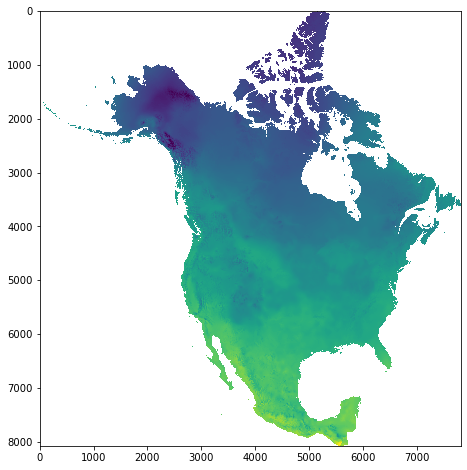

In [28]:
print(np.shape(tv))
print(np.nanmax(tv))
print(np.nanmin(tv))
print(np.nanmean(tv))
tvm = np.ma.masked_invalid(tv)
plt.imshow(tv[0,:,:])

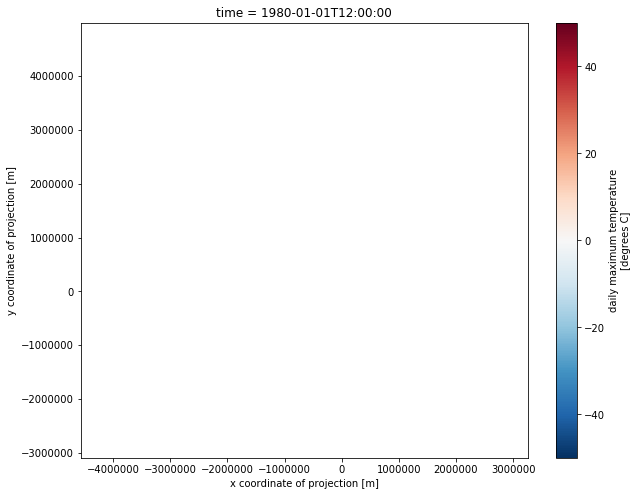

In [10]:
tmax = ds.tmax.isel(time=0)
# p = tmax.plot(col = 'time', aspect = ds.dims['x']/ds.dims['y'], size = 2)
tmax.plot(x = 'x', y='y')
# p = tmax.plot()
# p.axes.set_aspect('equal')
# plt.show()

In [ ]:
ds.tmax[0,3000,2000].plot()